In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<h3> Пункт а)

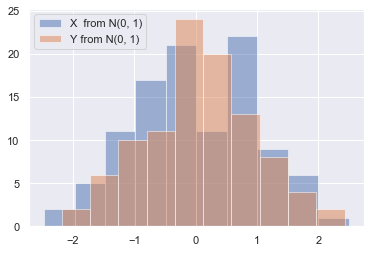

In [2]:
X = stats.norm.rvs(loc=0, scale=1, size=105)
Y = stats.norm.rvs(loc=0, scale=1, size=100)
plt.hist(X, label='X  from N(0, 1)', alpha=0.5)
plt.hist(Y, label='Y from N(0, 1)', alpha=0.5)
plt.legend()
plt.show()

In [3]:
def a_test(n, m, it, perm):
    pvalue_mw = list()
    pvalue_ks = list()
    pvalue_mw_per = list()
    pvalue_ks_per = list()
    for i in range(it):
        X = stats.norm.rvs(loc=0, scale=1, size=n)
        Y = stats.norm.rvs(loc=0, scale=1, size=m)
        
        stat_mw = stats.mannwhitneyu(X, Y, alternative='greater')[0]
        
        stat_ks = stats.ks_2samp(X, Y, alternative='greater')[0]
        
        pvalue_mw.append(stats.mannwhitneyu(X, Y, alternative='greater')[1])
        pvalue_ks.append(stats.ks_2samp(X, Y, alternative='greater')[1])
                         
        Z = np.hstack((X, Y))
        
        stats_perm_mw = list()
        stats_perm_ks = list()
        stats_perm_mw.append(stat_mw)
        stats_perm_ks.append(stat_ks)
        
        for j in range(perm):
            
            np.random.shuffle(Z)
            stats_perm_mw.append(stats.mannwhitneyu(Z[0:n], Z[n:], alternative='greater')[0])
            stats_perm_ks.append(stats.ks_2samp(Z[0:n], Z[n:], alternative='greater')[0])
            
        stats_perm_mw.sort()
        stats_perm_ks.sort()
        N_mw = stats_perm_mw.index(stat_mw, 0, len(stats_perm_mw))
        N_ks = stats_perm_ks.index(stat_ks, 0, len(stats_perm_ks))
        
        pvalue_mw_per.append((len(stats_perm_mw) - N_mw + 1)/len(stats_perm_mw))
        pvalue_ks_per.append((len(stats_perm_ks) - N_ks + 1)/len(stats_perm_ks))
        
    
    pvalue_mw.sort()
    pvalue_ks.sort()
    pvalue_mw_per.sort()
    pvalue_ks_per.sort()
    fig, ax = plt.subplots(figsize=(12, 8))
    dom = [i/it for i in range(1, it+1)]
    
    ax.plot(pvalue_mw, dom, label='Mann-Whitneyu')
    ax.plot(pvalue_ks, dom, label='KS')
    ax.plot(pvalue_mw_per, dom, label='Mann-Whitneyu_perm')
    ax.plot(dom, dom, '--r')
    ax.plot(pvalue_ks_per, dom, label='KS_perm')
    ax.legend()
    
    plt.show()

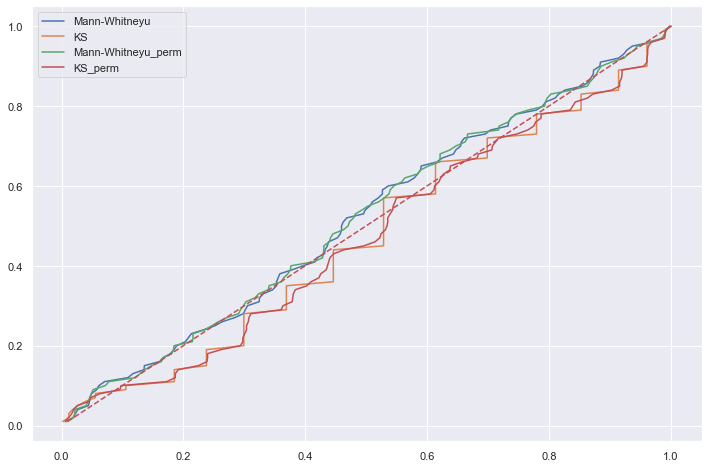

In [4]:
a_test(100, 100, 100, 1000)

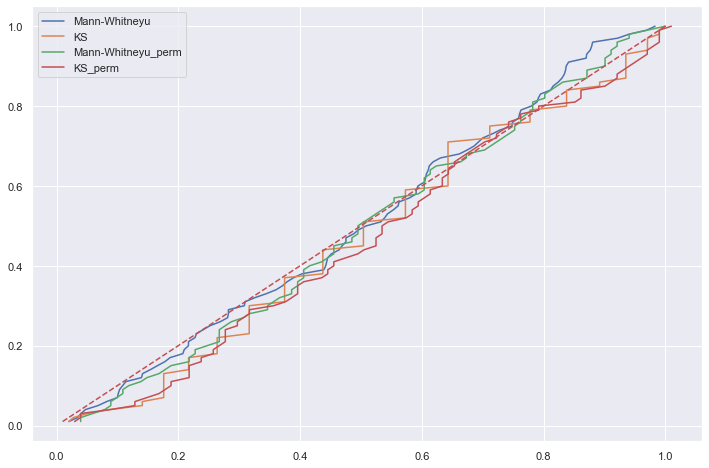

In [4]:
a_test(100, 50, 100, 100)

<h3> Пункт б)

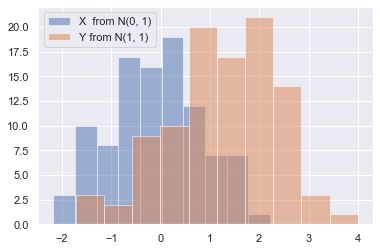

In [5]:
X = stats.norm.rvs(loc=0, scale=1, size=100)
Y = stats.norm.rvs(loc=1, scale=1, size=100)
plt.hist(X, label='X  from N(0, 1)', alpha=0.5)
plt.hist(Y, label='Y from N(1, 1)', alpha=0.5)
plt.legend()
plt.show()

In [18]:
def b_test(n, m, it, perm):
    pvalue_mw = list()
    pvalue_ks = list()
    pvalue_mw_per = list()
    pvalue_ks_per = list()
    for i in range(it):
        X = stats.norm.rvs(loc=0, scale=1, size=n)
        Y = stats.norm.rvs(loc=1, scale=1, size=m)
        
        stat_mw = stats.mannwhitneyu(X, Y, alternative='less')[0]
        
        stat_ks = stats.ks_2samp(X, Y, alternative='greater')[0]
        
        pvalue_mw.append(stats.mannwhitneyu(X, Y, alternative='less')[1])
        pvalue_ks.append(stats.ks_2samp(X, Y, alternative='greater')[1])
                         
        Z = np.hstack((X, Y))
        
        stats_perm_mw = list()
        stats_perm_ks = list()
        stats_perm_mw.append(stat_mw)
        stats_perm_ks.append(stat_ks)
        
        for j in range(perm):
            
            np.random.shuffle(Z)
            stats_perm_mw.append(stats.mannwhitneyu(Z[0:n], Z[n:], alternative='less')[0])
            stats_perm_ks.append(stats.ks_2samp(Z[0:n], Z[n:], alternative='greater')[0])
            
        stats_perm_mw.sort()
        stats_perm_ks.sort()
        N_mw = stats_perm_mw.index(stat_mw, 0, len(stats_perm_mw))
        N_ks = stats_perm_ks.index(stat_ks, 0, len(stats_perm_ks))
        
        pvalue_mw_per.append((N_mw + 1)/len(stats_perm_mw))
        pvalue_ks_per.append((len(stats_perm_ks) - N_ks + 1)/len(stats_perm_ks))
        
    
    pvalue_mw.sort()
    pvalue_ks.sort()
    pvalue_mw_per.sort()
    pvalue_ks_per.sort()
    fig, ax = plt.subplots(figsize=(12, 8))
    dom = [i/it for i in range(1, it+1)]
    
    ax.plot(pvalue_mw, dom, label='Mann-Whitneyu')
    ax.plot(pvalue_ks, dom, label='KS')
    ax.plot(pvalue_mw_per, dom, label='Mann-Whitneyu_perm')
    ax.plot(dom, dom, '--r')
    ax.plot(pvalue_ks_per, dom, label='KS_perm')
    ax.legend()
    
    plt.show()

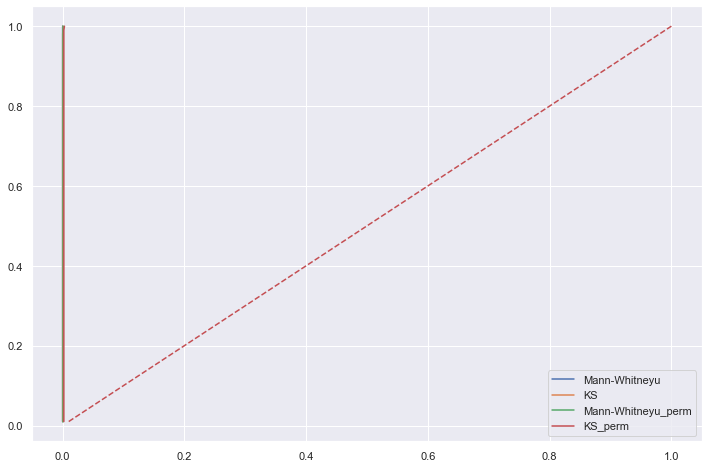

In [11]:
b_test(100, 100, 100, 1000)

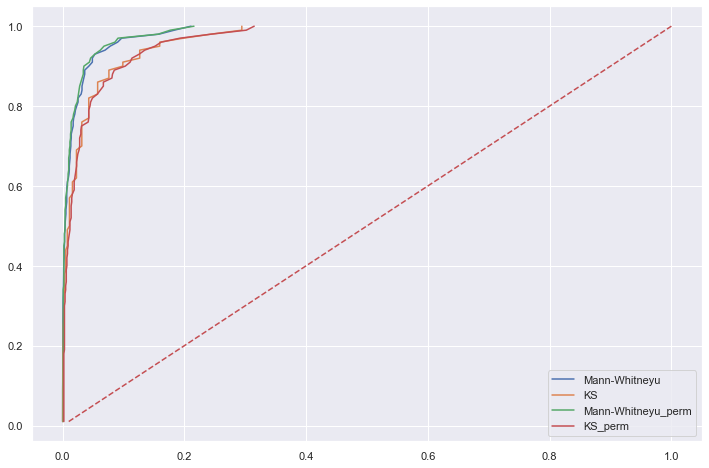

In [12]:
b_test(10, 50, 100, 1000)

<h3> Пункт в)

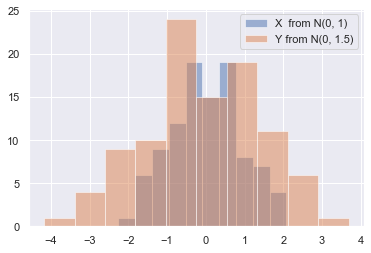

In [15]:
X = stats.norm.rvs(loc=0, scale=1, size=100)
Y = stats.norm.rvs(loc=0, scale=1.5, size=100)
plt.hist(X, label='X  from N(0, 1)', alpha=0.5)
plt.hist(Y, label='Y from N(0, 1.5)', alpha=0.5)
plt.legend()
plt.show()

In [38]:
def v_test(n, m, it, perm):
    pvalue_mw = list()
    pvalue_ks = list()
    pvalue_mw_per = list()
    pvalue_ks_per = list()
    for i in range(it):
        X = stats.norm.rvs(loc=0, scale=1, size=n)
        Y = stats.norm.rvs(loc=0, scale=1.5, size=m)
        
        stat_mw = stats.mannwhitneyu(X, Y, alternative='greater')[0]
        
        stat_ks = stats.ks_2samp(X, Y, alternative='greater')[0]
        
        pvalue_mw.append(stats.mannwhitneyu(X, Y, alternative='greater')[1])
        pvalue_ks.append(stats.ks_2samp(X, Y, alternative='greater')[1])
                         
        Z = np.hstack((X, Y))
        
        stats_perm_mw = list()
        stats_perm_ks = list()
        stats_perm_mw.append(stat_mw)
        stats_perm_ks.append(stat_ks)
        
        for j in range(perm):
            
            np.random.shuffle(Z)
            stats_perm_mw.append(stats.mannwhitneyu(Z[0:n], Z[n:], alternative='greater')[0])
            stats_perm_ks.append(stats.ks_2samp(Z[0:n], Z[n:], alternative='greater')[0])
            
        stats_perm_mw.sort()
        stats_perm_ks.sort()
        N_mw = stats_perm_mw.index(stat_mw, 0, len(stats_perm_mw))
        N_ks = stats_perm_ks.index(stat_ks, 0, len(stats_perm_ks))
        
        pvalue_mw_per.append((len(stats_perm_mw) - N_mw + 1)/len(stats_perm_mw))
        pvalue_ks_per.append((len(stats_perm_ks) - N_ks + 1)/len(stats_perm_ks))
        
    
    pvalue_mw.sort()
    pvalue_ks.sort()
    pvalue_mw_per.sort()
    pvalue_ks_per.sort()
    fig, ax = plt.subplots(figsize=(12, 8))
    dom = [i/it for i in range(1, it+1)]
    
    ax.plot(pvalue_mw, dom, label='Mann-Whitneyu')
    ax.plot(pvalue_ks, dom, label='KS')
    ax.plot(pvalue_mw_per, dom, label='Mann-Whitneyu_perm')
    ax.plot(dom, dom, '--r')
    ax.plot(pvalue_ks_per, dom, label='KS_perm')
    ax.legend()
    
    plt.show()

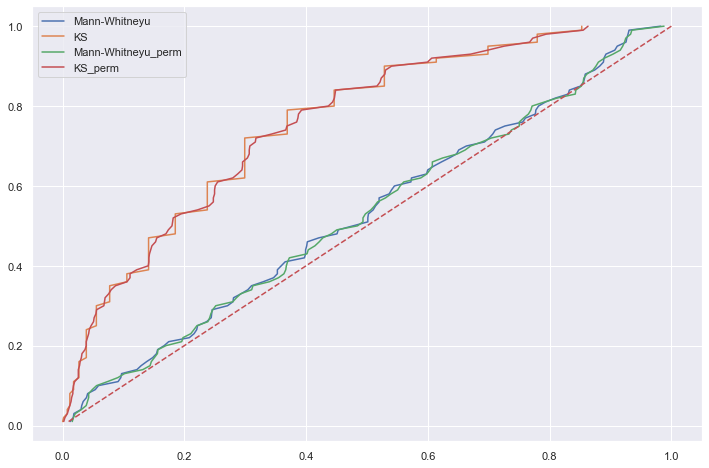

In [26]:
v_test(100, 100, 100, 1000)

<h3> Пункт г)

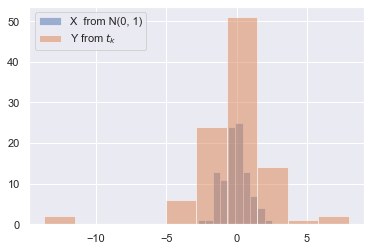

In [35]:
X = stats.norm.rvs(loc=0, scale=1, size=100)
Y = stats.t.rvs(df=2, loc=0, scale=1, size=100)
plt.hist(X, label='X  from N(0, 1)', alpha=0.5)
plt.hist(Y, label='Y from $t_{k}$', alpha=0.5)
plt.legend()
plt.show()

In [37]:
def g_test(n, m, it, perm, df):
    pvalue_mw = list()
    pvalue_ks = list()
    pvalue_mw_per = list()
    pvalue_ks_per = list()
    for i in range(it):
        X = stats.norm.rvs(loc=0, scale=1, size=n)
        Y = stats.t.rvs(df=df, loc=0, scale=1, size=m)
        
        stat_mw = stats.mannwhitneyu(X, Y, alternative='greater')[0]
        
        stat_ks = stats.ks_2samp(X, Y, alternative='greater')[0]
        
        pvalue_mw.append(stats.mannwhitneyu(X, Y, alternative='greater')[1])
        pvalue_ks.append(stats.ks_2samp(X, Y, alternative='greater')[1])
                         
        Z = np.hstack((X, Y))
        
        stats_perm_mw = list()
        stats_perm_ks = list()
        stats_perm_mw.append(stat_mw)
        stats_perm_ks.append(stat_ks)
        
        for j in range(perm):
            
            np.random.shuffle(Z)
            stats_perm_mw.append(stats.mannwhitneyu(Z[0:n], Z[n:], alternative='greater')[0])
            stats_perm_ks.append(stats.ks_2samp(Z[0:n], Z[n:], alternative='greater')[0])
            
        stats_perm_mw.sort()
        stats_perm_ks.sort()
        N_mw = stats_perm_mw.index(stat_mw, 0, len(stats_perm_mw))
        N_ks = stats_perm_ks.index(stat_ks, 0, len(stats_perm_ks))
        
        pvalue_mw_per.append((len(stats_perm_mw) - N_mw + 1)/len(stats_perm_mw))
        pvalue_ks_per.append((len(stats_perm_ks) - N_ks + 1)/len(stats_perm_ks))
        
    
    pvalue_mw.sort()
    pvalue_ks.sort()
    pvalue_mw_per.sort()
    pvalue_ks_per.sort()
    fig, ax = plt.subplots(figsize=(12, 8))
    dom = [i/it for i in range(1, it+1)]
    
    ax.plot(pvalue_mw, dom, label='Mann-Whitneyu')
    ax.plot(pvalue_ks, dom, label='KS')
    ax.plot(pvalue_mw_per, dom, label='Mann-Whitneyu_perm')
    ax.plot(dom, dom, '--r')
    ax.plot(pvalue_ks_per, dom, label='KS_perm')
    ax.legend()
    
    plt.show()

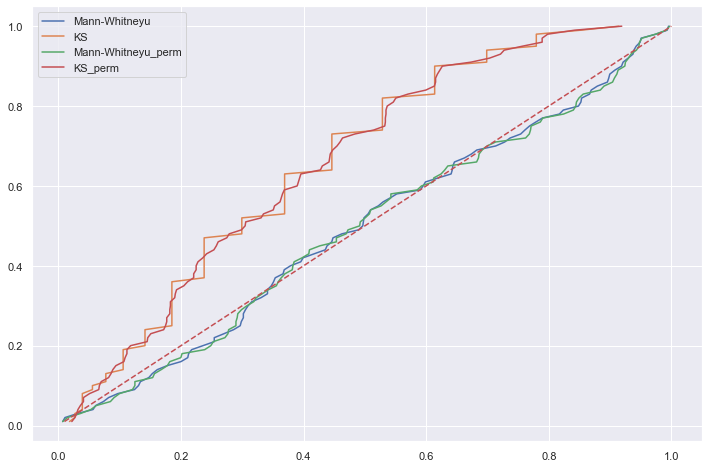

In [39]:
g_test(100, 100, 100, 1000, 2)

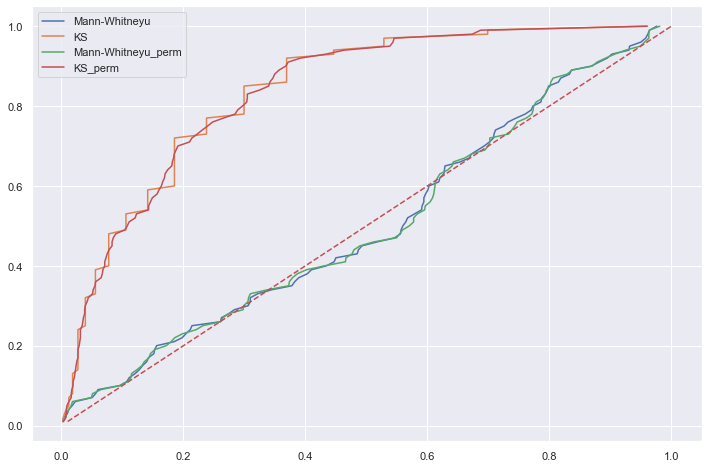

In [40]:
g_test(100, 100, 100, 1000, 1)

<h3> Пункт д)

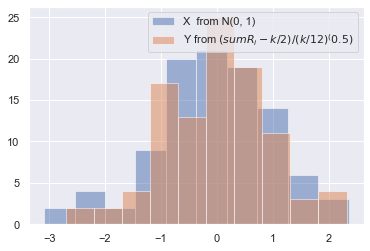

In [48]:
k = 50
X = stats.norm.rvs(loc=0, scale=1, size=100)
Y = list()
for i in range(100):
    y_sample = stats.uniform.rvs(loc=0, scale=1, size=k)
    y_sum = sum(y_sample)
    Y.append(y_sum)

Y= np.array(Y)
Y = (Y - k/2)/(k/12)**(1/2)

plt.hist(X, label='X  from N(0, 1)', alpha=0.5)
plt.hist(Y, label='Y from $(sum{R_{i}} - k/2)/(k/12)^(0.5)$', alpha=0.5)
plt.legend()
plt.show()

In [49]:
def d_test(n, m, it, perm, k):
    pvalue_mw = list()
    pvalue_ks = list()
    pvalue_mw_per = list()
    pvalue_ks_per = list()
    for i in range(it):
        X = stats.norm.rvs(loc=0, scale=1, size=n)
        
        Y = list()
        for i in range(m):
            y_sample = stats.uniform.rvs(loc=0, scale=1, size=k)
            y_sum = sum(y_sample)
            Y.append(y_sum)

        Y= np.array(Y)
        Y = (Y - k/2)/(k/12)**(1/2)
        
        stat_mw = stats.mannwhitneyu(X, Y, alternative='greater')[0]
        
        stat_ks = stats.ks_2samp(X, Y, alternative='greater')[0]
        
        pvalue_mw.append(stats.mannwhitneyu(X, Y, alternative='greater')[1])
        pvalue_ks.append(stats.ks_2samp(X, Y, alternative='greater')[1])
                         
        Z = np.hstack((X, Y))
        
        stats_perm_mw = list()
        stats_perm_ks = list()
        stats_perm_mw.append(stat_mw)
        stats_perm_ks.append(stat_ks)
        
        for j in range(perm):
            
            np.random.shuffle(Z)
            stats_perm_mw.append(stats.mannwhitneyu(Z[0:n], Z[n:], alternative='greater')[0])
            stats_perm_ks.append(stats.ks_2samp(Z[0:n], Z[n:], alternative='greater')[0])
            
        stats_perm_mw.sort()
        stats_perm_ks.sort()
        N_mw = stats_perm_mw.index(stat_mw, 0, len(stats_perm_mw))
        N_ks = stats_perm_ks.index(stat_ks, 0, len(stats_perm_ks))
        
        pvalue_mw_per.append((len(stats_perm_mw) - N_mw + 1)/len(stats_perm_mw))
        pvalue_ks_per.append((len(stats_perm_ks) - N_ks + 1)/len(stats_perm_ks))
        
    
    pvalue_mw.sort()
    pvalue_ks.sort()
    pvalue_mw_per.sort()
    pvalue_ks_per.sort()
    fig, ax = plt.subplots(figsize=(12, 8))
    dom = [i/it for i in range(1, it+1)]
    
    ax.plot(pvalue_mw, dom, label='Mann-Whitneyu')
    ax.plot(pvalue_ks, dom, label='KS')
    ax.plot(pvalue_mw_per, dom, label='Mann-Whitneyu_perm')
    ax.plot(dom, dom, '--r')
    ax.plot(pvalue_ks_per, dom, label='KS_perm')
    ax.legend()
    
    plt.show()

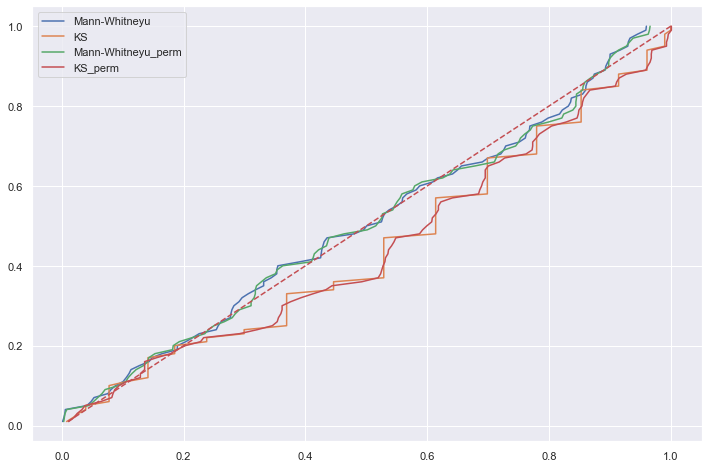

In [50]:
d_test(100, 100, 100, 1000, 50)

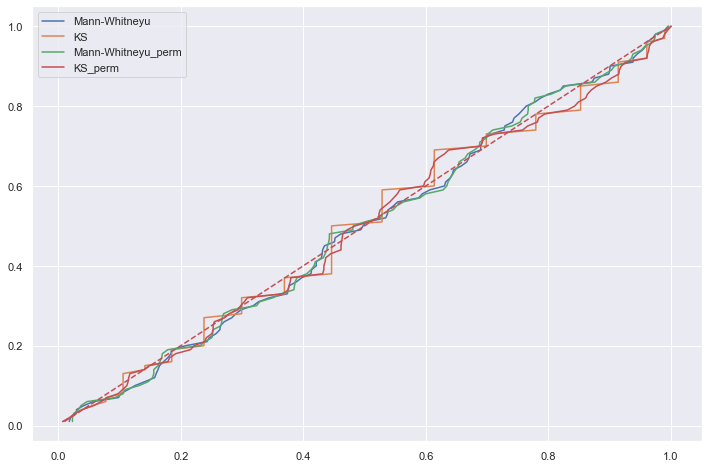

In [51]:
d_test(100, 100, 100, 1000, 10)

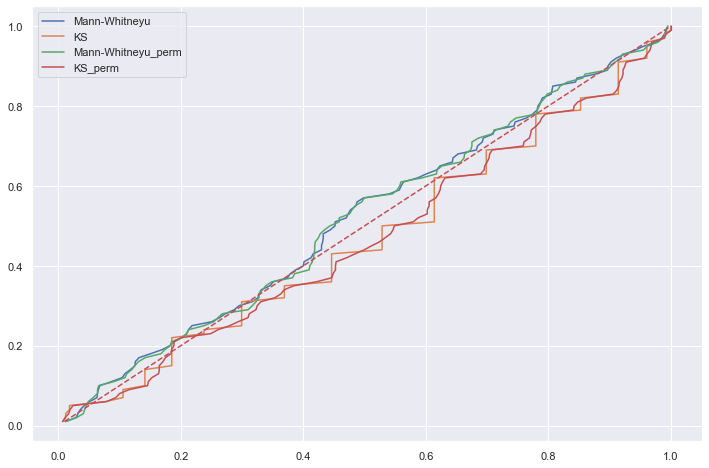

In [52]:
d_test(100, 100, 100, 1000, 5)

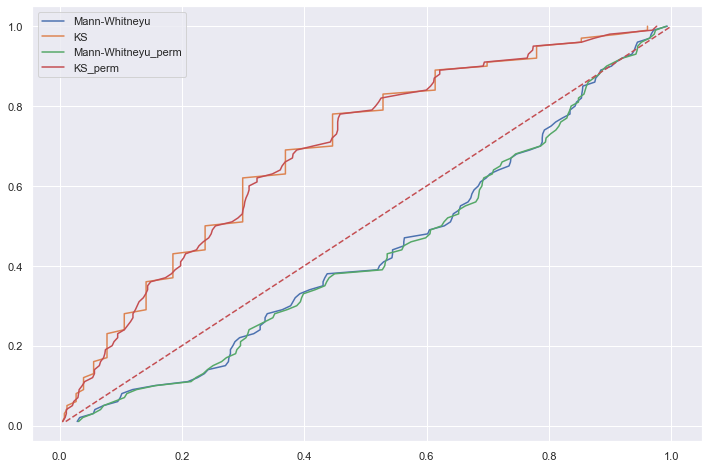

In [53]:
d_test(100, 100, 100, 1000, 1)